<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/combination%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#***import requirements***#
#-------------------------#
import keras
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model.hdf5"

In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [4]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model = RandomForestClassifier(n_estimators=70, max_depth= 19, min_samples_split=2, random_state=0)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df], axis=1)

766/766 [==============================] - 1s 2ms/step


In [5]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(90, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(70, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(50, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(30, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=100)

#model.summary()

Epoch 1/1000
49/49 [==============================] - 4s 22ms/step - loss: 1.0900 - accuracy: 0.4106 - val_loss: 1.1908 - val_accuracy: 0.0000e+00
Epoch 2/1000
49/49 [==============================] - 0s 10ms/step - loss: 0.9712 - accuracy: 0.4150 - val_loss: 1.4205 - val_accuracy: 0.2729
Epoch 3/1000
49/49 [==============================] - 1s 10ms/step - loss: 0.8487 - accuracy: 0.4977 - val_loss: 0.9232 - val_accuracy: 0.7820
Epoch 4/1000
49/49 [==============================] - 1s 11ms/step - loss: 0.8327 - accuracy: 0.5038 - val_loss: 0.8840 - val_accuracy: 0.7695
Epoch 5/1000
49/49 [==============================] - 1s 10ms/step - loss: 0.8275 - accuracy: 0.5069 - val_loss: 0.9116 - val_accuracy: 0.7516
Epoch 6/1000
49/49 [==============================] - 1s 11ms/step - loss: 0.8220 - accuracy: 0.5142 - val_loss: 0.8330 - val_accuracy: 0.7732
Epoch 7/1000
49/49 [==============================] - 1s 10ms/step - loss: 0.8180 - accuracy: 0.5343 - val_loss: 0.9162 - val_accuracy: 0.

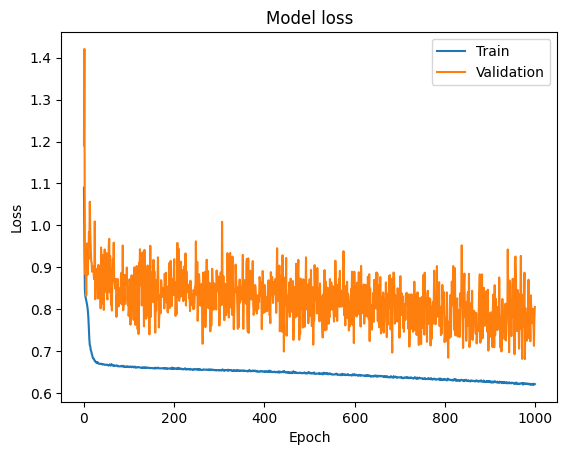



*********************************************




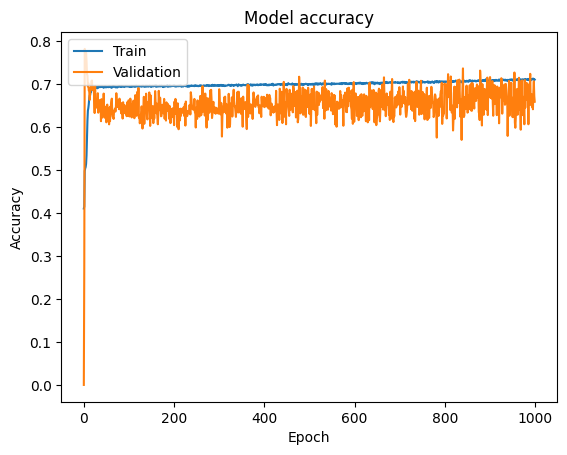



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 0.9870 - accuracy: 0.5916
[0.987021803855896, 0.5916167497634888]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.67      0.62      0.64      2042
     class 1       0.47      0.57      0.52      1327
     class 2       0.67      0.54      0.60       806

    accuracy                           0.59      4175
   macro avg       0.60      0.58      0.59      4175
weighted avg       0.60      0.59      0.60      4175



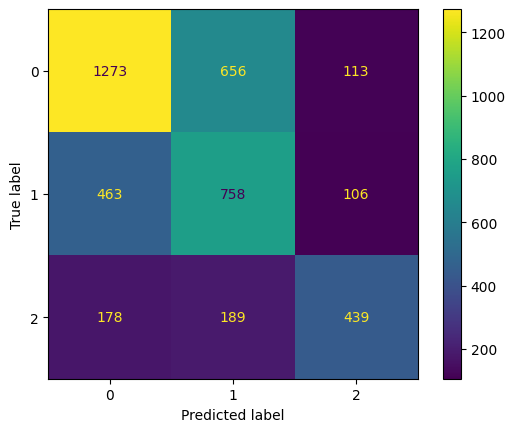



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 2ms/step - loss: 0.6547 - accuracy: 0.7030
[0.6546977758407593, 0.7029642462730408]
766/766 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.66      0.71      0.68      8164
     class 1       0.62      0.74      0.68      8164
     class 2       0.90      0.66      0.76      8164

    accuracy                           0.70     24492
   macro avg       0.73      0.70      0.71     24492
weighted avg       0.73      0.70      0.71     24492



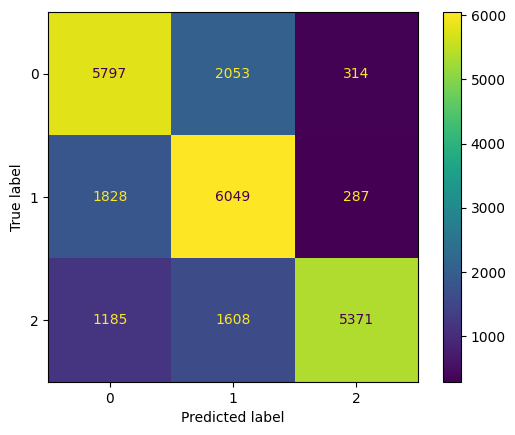

In [7]:
#***Model First Try Learning***#
#------------------------------#

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Epoch 1/1000
3/3 [==============================] - 0s 99ms/step - loss: 0.6164 - accuracy: 0.7141 - val_loss: 0.7532 - val_accuracy: 0.6961
Epoch 2/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.6159 - accuracy: 0.7131 - val_loss: 0.7220 - val_accuracy: 0.7169
Epoch 3/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.6155 - accuracy: 0.7134 - val_loss: 0.7397 - val_accuracy: 0.6983
Epoch 4/1000
3/3 [==============================] - 0s 73ms/step - loss: 0.6133 - accuracy: 0.7144 - val_loss: 0.7633 - val_accuracy: 0.6759
Epoch 5/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.6124 - accuracy: 0.7147 - val_loss: 0.7658 - val_accuracy: 0.6742
Epoch 6/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.6117 - accuracy: 0.7159 - val_loss: 0.7492 - val_accuracy: 0.6848
Epoch 7/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.6112 - accuracy: 0.7155 - val_loss: 0.7516 - val_accuracy: 0.6861
Epoch 8/1000


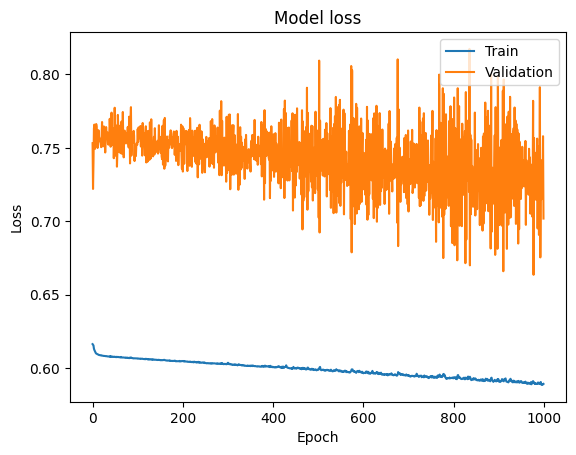



*********************************************




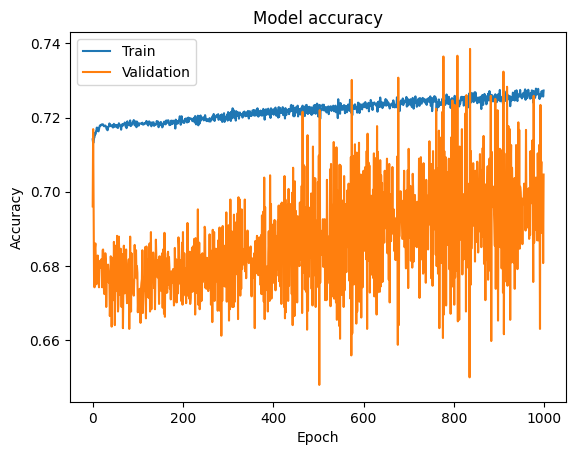



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 1.0616 - accuracy: 0.5892
[1.0616329908370972, 0.5892215371131897]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.67      0.61      0.64      2042
     class 1       0.48      0.57      0.52      1327
     class 2       0.64      0.57      0.60       806

    accuracy                           0.59      4175
   macro avg       0.59      0.58      0.59      4175
weighted avg       0.60      0.59      0.59      4175



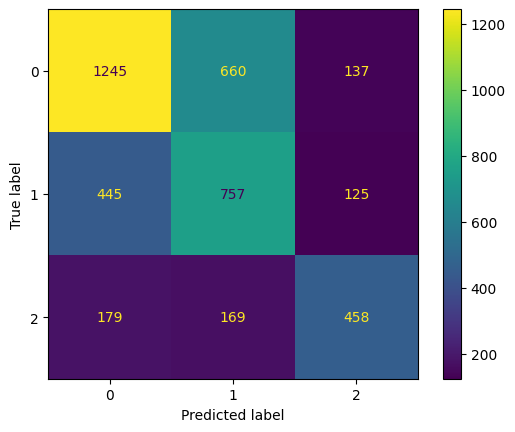



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 2ms/step - loss: 0.6111 - accuracy: 0.7211
[0.611139714717865, 0.7211334109306335]
766/766 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.68      0.70      0.69      8164
     class 1       0.64      0.76      0.70      8164
     class 2       0.90      0.71      0.79      8164

    accuracy                           0.72     24492
   macro avg       0.74      0.72      0.72     24492
weighted avg       0.74      0.72      0.72     24492



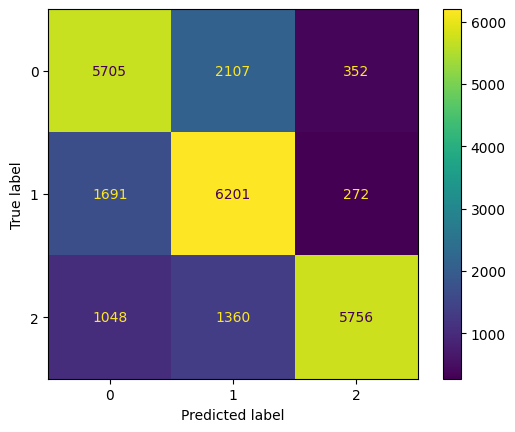

In [8]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [9]:
checkpoint.best

0.5893192887306213

Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 1.0616 - accuracy: 0.5892
[1.0616329908370972, 0.5892215371131897]
131/131 [==============================] - 1s 4ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.67      0.61      0.64      2042
     class 1       0.48      0.57      0.52      1327
     class 2       0.64      0.57      0.60       806

    accuracy                           0.59      4175
   macro avg       0.59      0.58      0.59      4175
weighted avg       0.60      0.59      0.59      4175



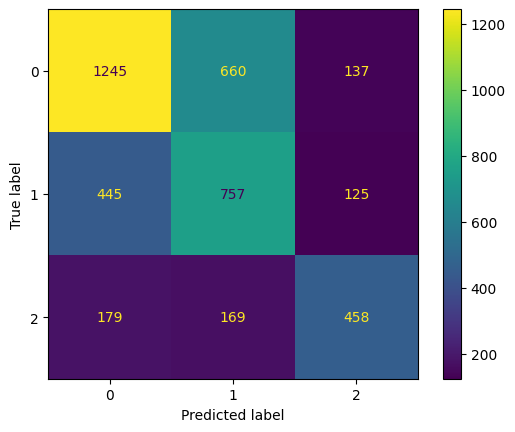



*********************************************
Train-set evaluate result:

766/766 [==============================] - 3s 3ms/step - loss: 0.6111 - accuracy: 0.7211
[0.611139714717865, 0.7211334109306335]
766/766 [==============================] - 2s 3ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.68      0.70      0.69      8164
     class 1       0.64      0.76      0.70      8164
     class 2       0.90      0.71      0.79      8164

    accuracy                           0.72     24492
   macro avg       0.74      0.72      0.72     24492
weighted avg       0.74      0.72      0.72     24492



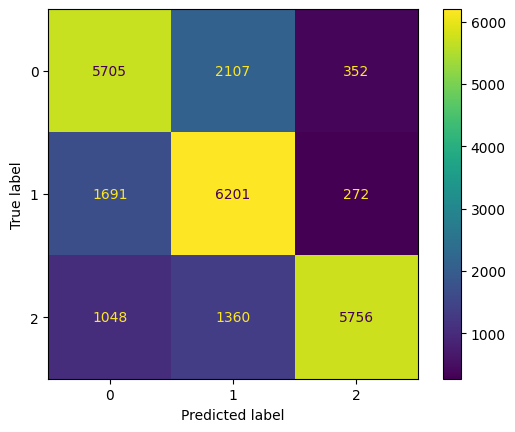

In [10]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [11]:
model.save("/content/drive/MyDrive/new_df/best_model")